In [1]:
%load_ext autoreload
%autoreload 2

## 0. Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Plot the `mean` and `stdev` of the corner reflectors for a given `burst_id` per `date`

In [3]:
# Define parameters
save_dir = '/u/trappist-r0/bato/work/cslc_validation/calval/ALE/Rosamond/T064_135523_IW2'
burst_id = 't064_135523_iw2'
cr_network = 'Rosamond'


In [4]:
# Summary files
outcsv1 = f'ALE_{cr_network}_{burst_id.upper()}.csv'
outcsv2 = f'ALE_{cr_network}_{burst_id.upper()}_ID.csv'

In [5]:
# Read csv results
df = pd.read_csv(f'{save_dir}/summary/{outcsv1}', sep=',')
del df[df.columns[0]]
df.columns = ['Date','EW_avg','EW_std','NS_avg','NS_std','GRg_avg','GRg_std','Az_avg','Az_std']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,Date,EW_avg,EW_std,NS_avg,NS_std,GRg_avg,GRg_std,Az_avg,Az_std
0,2015-05-26,0.164,1.019,0.124,0.660,-0.139,1.031,0.092,0.707
1,2015-08-18,0.355,1.002,-0.278,1.410,-0.399,0.978,-0.337,1.370
2,2015-10-29,0.298,0.984,0.046,0.629,-0.285,0.980,-0.009,0.652
3,2015-02-07,-1.501,0.274,0.412,0.725,1.551,0.339,0.677,0.732
4,2015-01-14,-1.466,0.201,0.827,0.211,1.591,0.236,1.079,0.244


In [6]:
def if_pass(ts,requirement):
    bool_pass = (ts > -requirement) & (ts < requirement)
    pass_rate = np.count_nonzero(bool_pass)/len(bool_pass)
    return bool_pass, pass_rate, pass_rate>0.8

In [7]:
# Evaluate if the point is passing the requirement or not
rg_bool_pass, rg_pass_rate, rg_pass_or_not = if_pass(df['GRg_avg'],1.5)
az_bool_pass, az_pass_rate, az_pass_or_not = if_pass(df['Az_avg'],1.5)

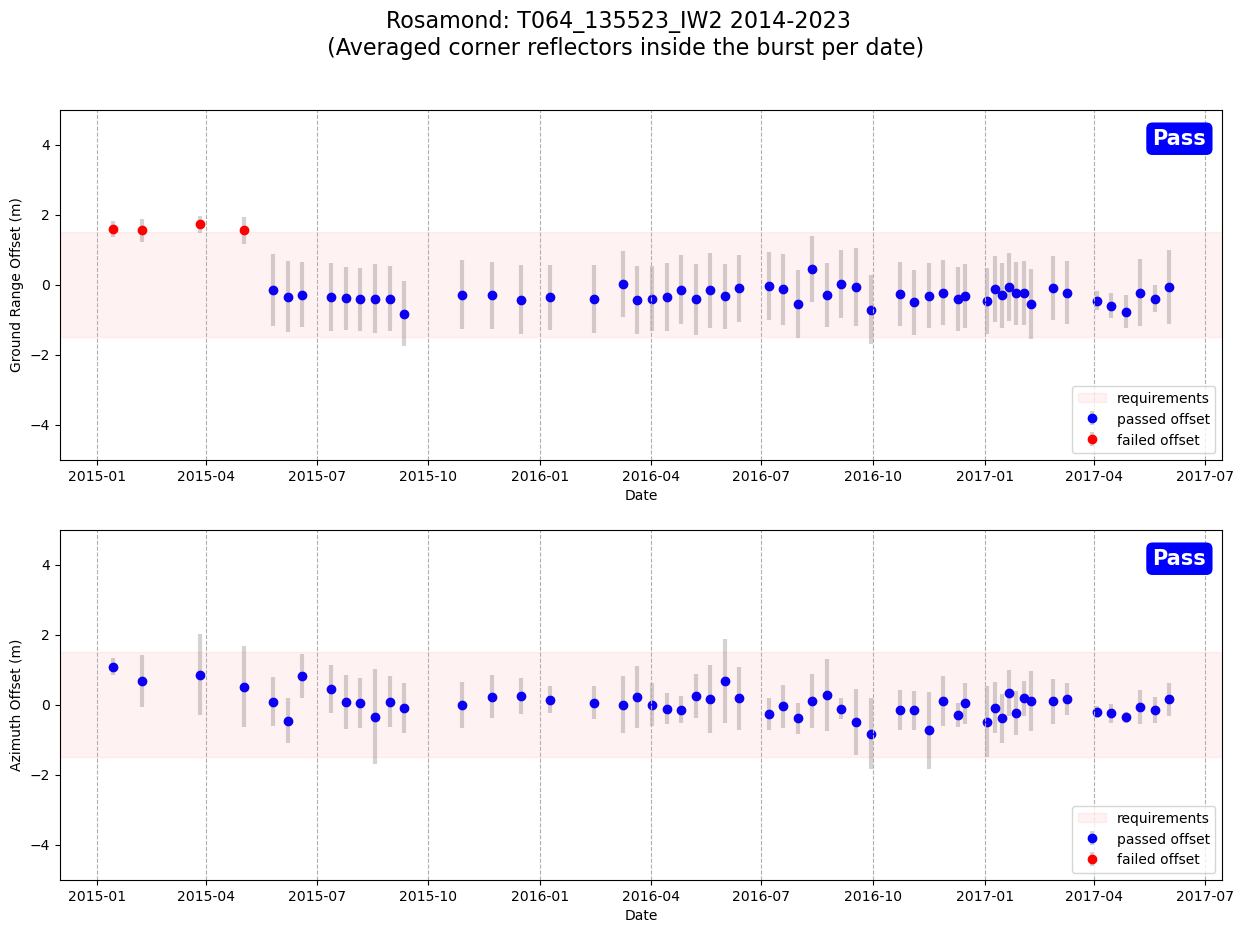

In [8]:
# Plot figure
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05,label='requirements')    #OPERA requirements in ground range
ax[0].errorbar(df['Date'][rg_bool_pass],df['GRg_avg'][rg_bool_pass],df['GRg_std'][rg_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='passed offset')
ax[0].errorbar(df['Date'][~rg_bool_pass],df['GRg_avg'][~rg_bool_pass],df['GRg_std'][~rg_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='failed offset')
ax[0].set_ylim(-5,5)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].grid(axis='x',linestyle='--')
if rg_pass_or_not:
    ax[0].text(0.94,0.90,'Pass',color='w',size=15,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
    ax[0].text(0.94,0.90,'Fail',color='w',size=15,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[0].legend(loc = 'lower right',frameon=True)

ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05,label='requirements')    #OPERA requirements in azimuth
ax[1].errorbar(df['Date'][az_bool_pass],df['Az_avg'][az_bool_pass],df['Az_std'][az_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='passed offset')
ax[1].errorbar(df['Date'][~az_bool_pass],df['Az_avg'][~az_bool_pass],df['Az_std'][~az_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0,label='failed offset')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].set_ylim(-5,5)
ax[1].grid(axis='x',linestyle='--')
if az_pass_or_not:
    ax[1].text(0.94,0.90,'Pass',color='w',size=15,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
    ax[1].text(0.94,0.90,'Fail',color='w',size=15,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[1].legend(loc = 'lower right',frameon=True)
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_ts_grazi_mean.png',dpi=300,bbox_inches='tight')

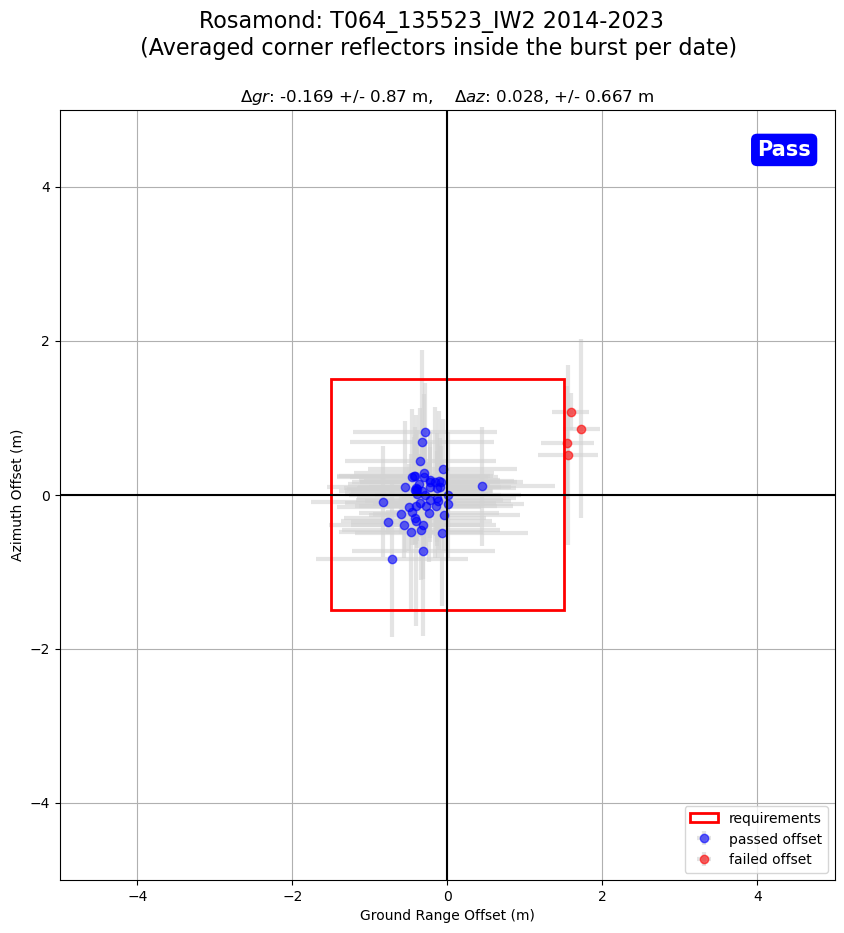

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10),sharex=True)
ale_req = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none',label='requirements')  #OPERA ALE requirements
ax.errorbar(df['GRg_avg'][rg_bool_pass & az_bool_pass],df['Az_avg'][rg_bool_pass & az_bool_pass],xerr=df['GRg_std'][rg_bool_pass & az_bool_pass],yerr=df['Az_std'][rg_bool_pass & az_bool_pass],marker='o',color='b',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.6, zorder=0,label='passed offset')
ax.errorbar(df['GRg_avg'][~rg_bool_pass | ~az_bool_pass],df['Az_avg'][~rg_bool_pass | ~az_bool_pass],xerr=df['GRg_std'][~rg_bool_pass | ~az_bool_pass],yerr=df['Az_std'][~rg_bool_pass | ~az_bool_pass],marker='o',color='r',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, alpha=0.6, zorder=0,label='failed offset')
if rg_pass_or_not:
   ax.text(0.90,0.94,'Pass',color='w',size=15,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
   ax.text(0.90,0.94,'Fail',color='w',size=15,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df.GRg_avg.mean(),3)} +/- {np.round(df.GRg_std.mean(),3)} m, \
   $\Delta az$: {np.round(df.Az_avg.mean(),3)}, +/- {np.round(df.Az_std.mean(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
ax.add_patch(ale_req)
ax.legend(loc = 'lower right',frameon=True)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_grazi_mean.png',dpi=300,bbox_inches='tight')

## 2. Plot <span style="color:red">ALL</span> the corner reflectors for a given `burst_id` from `2014-2023`

In [10]:
df = pd.read_csv(f'{save_dir}/summary/{outcsv2}', sep=',')
del df[df.columns[0]]
df.columns = ['ID','lat','lon','hgt','azm','tilt','slen','UTMx','UTMy','xloc','yloc','xloc_subpx','yloc_subpx','xloc_peak','yloc_peak','snr','azi_angle','inc_angle','ALE_EW','ALE_NS','ALE_GRg','ALE_Az','Date']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df.head()

,ID,lat,lon,hgt,azm,tilt,slen,UTMx,UTMy,xloc,...,xloc_peak,yloc_peak,snr,azi_angle,inc_angle,ALE_EW,ALE_NS,ALE_GRg,ALE_Az,Date
0,5,34.805493,-118.070801,661.114274,173.17,9.09,2.4,402055.018838,3.851996e+06,1960,...,1960.246069,3035.977324,15.460954,100.430680,36.585840,-1.288495,0.563304,1.369186,0.787272,2014-12-21
1,9,34.805814,-118.048913,661.334966,175.12,10.24,2.4,404057.527003,3.852010e+06,2361,...,2360.692901,3034.582189,15.156937,100.418080,36.710815,-1.562498,1.005360,1.718538,1.271332,2014-12-21
2,12,34.806046,-118.032279,661.788536,172.37,11.73,2.4,405579.323349,3.852020e+06,2665,...,2665.045513,3033.590368,15.333250,100.408540,36.805380,-1.595782,1.133847,1.774370,1.403492,2014-12-21
3,1,34.799762,-118.087048,661.156921,170.00,8.39,2.4,400561.908789,3.851376e+06,1661,...,1662.028983,3097.793778,15.736578,100.440834,36.485935,0.736125,-0.841286,-0.876394,-0.960757,2015-05-26
4,2,34.805236,-118.087457,660.958100,170.00,9.57,2.4,400531.067182,3.851984e+06,1655,...,1655.767228,3037.202646,15.125273,100.440270,36.490406,0.268956,0.728233,-0.132540,0.667439,2015-05-26


In [11]:
# Evaluate if the point is passing the requirement or not
rg_bool_pass, rg_pass_rate, rg_pass_or_not = if_pass(df['ALE_GRg'],1.5)
az_bool_pass, az_pass_rate, az_pass_or_not = if_pass(df['ALE_Az'],1.5)

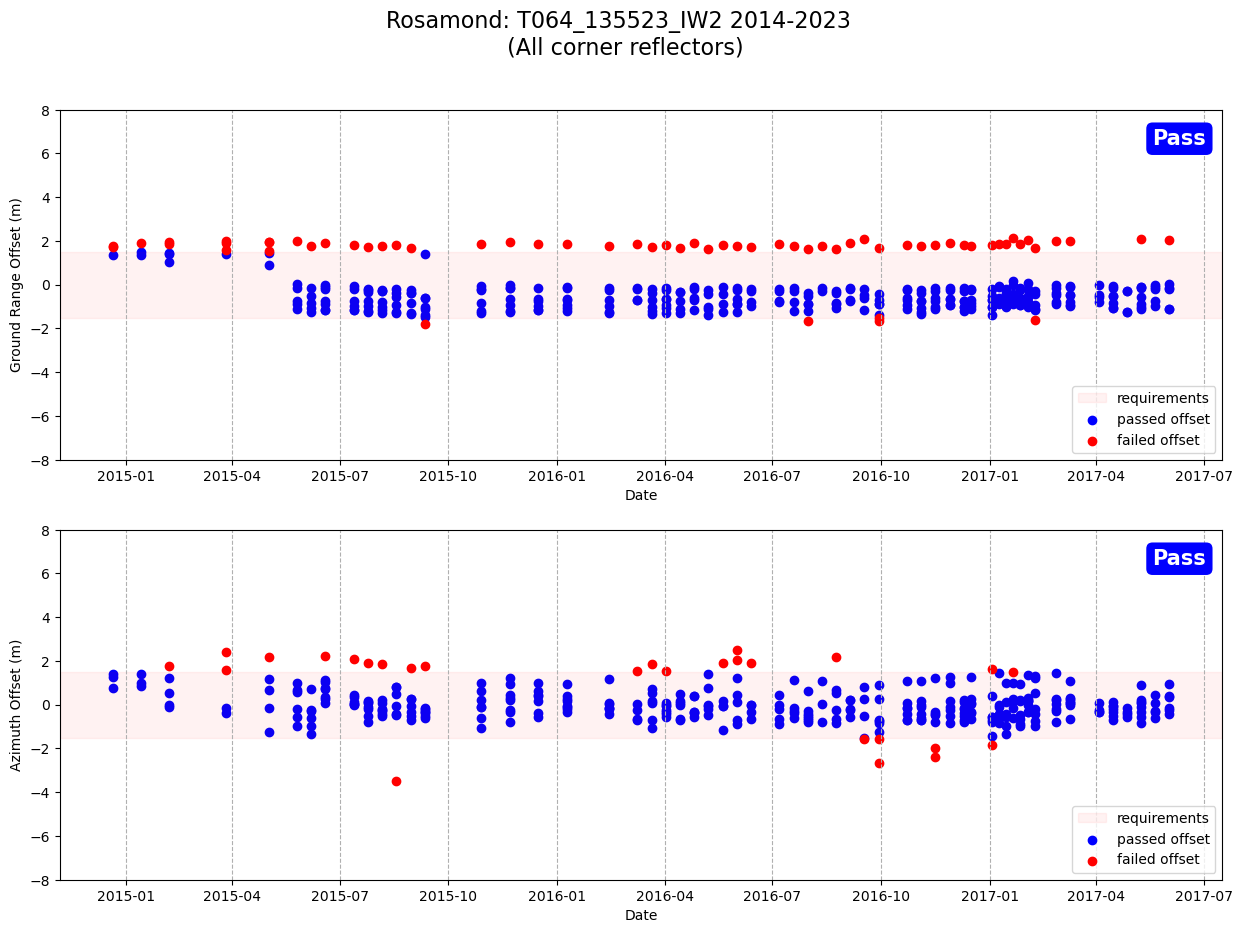

In [12]:
# Plot results
fig, ax = plt.subplots(2,1,figsize=(15,10))

gr_req = ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
ax[0].scatter(df['Date'][rg_bool_pass],df['ALE_GRg'][rg_bool_pass],marker='o',color='b',zorder=0, label='passed offset')
ax[0].scatter(df['Date'][~rg_bool_pass],df['ALE_GRg'][~rg_bool_pass],marker='o',color='r',zorder=0, label='failed offset')
ax[0].set_xlabel('Date')
ax[0].set_ylim(-8,8)
ax[0].grid(axis='x',linestyle='--')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].legend(loc='lower right')
if rg_pass_or_not:
    ax[0].text(0.94,0.90,'Pass',color='w',size=15,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
    ax[0].text(0.94,0.90,'Fail',color='w',size=15,weight='bold',transform = ax[0].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax[0].legend(loc = 'lower right',frameon=True)

az_req = ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
ax[1].scatter(df['Date'][az_bool_pass],df['ALE_Az'][az_bool_pass],marker='o',color='b',zorder=0, label='passed offset')
ax[1].scatter(df['Date'][~az_bool_pass],df['ALE_Az'][~az_bool_pass],marker='o',color='r',zorder=0,label='failed offset')
ax[1].set_xlabel('Date')
ax[1].set_ylim(-8,8)
ax[1].grid(axis='x',linestyle='--')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].legend(loc='lower right')
if az_pass_or_not:
    ax[1].text(0.94,0.90,'Pass',color='w',size=15,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
    ax[1].text(0.94,0.90,'Fail',color='w',size=15,weight='bold',transform = ax[1].transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_ts_grazi_all.png',dpi=300,bbox_inches='tight')

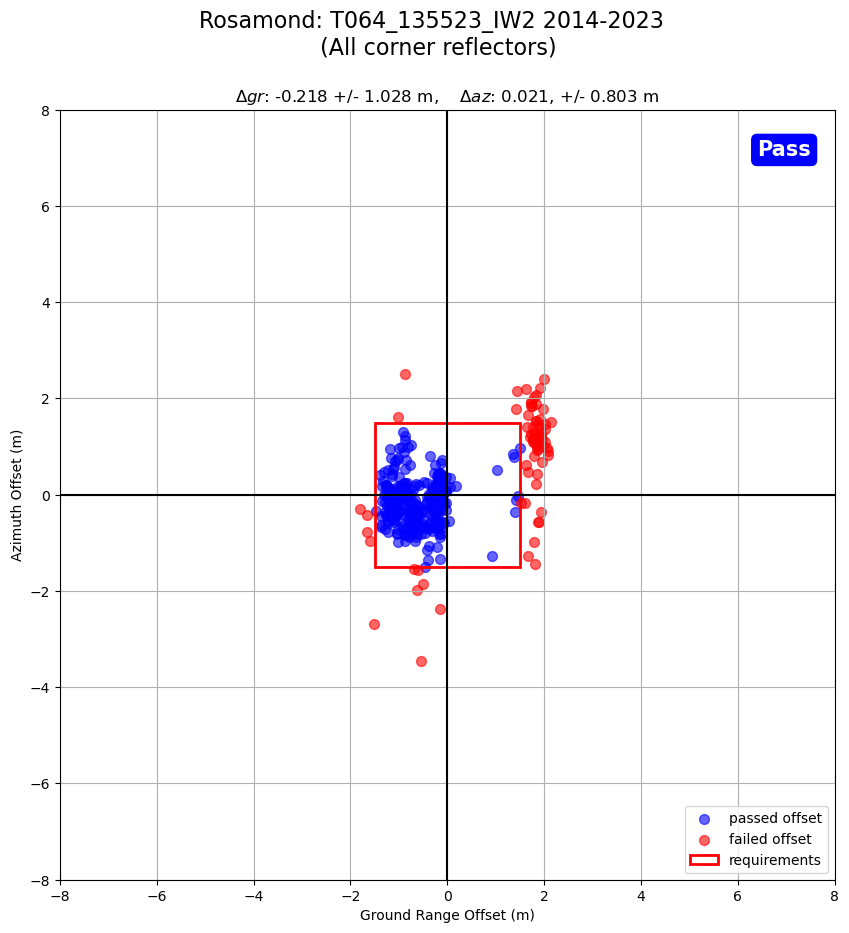

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
rect = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none', label='requirements')  #OPERA ALE requirements
ax.scatter(df['ALE_GRg'][rg_bool_pass & az_bool_pass], df['ALE_Az'][rg_bool_pass & az_bool_pass], s=50, alpha=0.6, color='b', zorder=0, label='passed offset')
ax.scatter(df['ALE_GRg'][~rg_bool_pass | ~az_bool_pass], df['ALE_Az'][~rg_bool_pass | ~az_bool_pass], s=50, alpha=0.6, color='r', zorder=0, label='failed offset')
if rg_pass_or_not & az_pass_or_not:
   ax.text(0.90,0.94,'Pass',color='w',size=15,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='blue',boxstyle='round',edgecolor='none'))
else:
   ax.text(0.90,0.94,'Fail',color='w',size=15,weight='bold',transform = ax.transAxes,bbox=dict(facecolor='red',boxstyle='round',edgecolor='none'))
ax.grid(True)
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df["ALE_GRg"].mean(),3)} +/- {np.round(df["ALE_GRg"].std(),3)} m, \
   $\Delta az$: {np.round(df["ALE_Az"].mean(),3)}, +/- {np.round(df["ALE_Az"].std(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
ax.add_patch(rect)
ax.legend(loc = 'lower right',frameon=True)
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig(f'{save_dir}/pngs/ALE_summary_{cr_network}_{burst_id.upper()}_grazi_all.png',dpi=300,bbox_inches='tight')